### Import

In [31]:
from astrosceni.image import Image
from astrosceni.stars_filter import StarsFilter
from astrosceni.mufinder import MuFinder
from matplotlib import pyplot as plt
import numpy as np

from astropy.convolution import Gaussian2DKernel
from astropy.convolution import convolve

# Image Class

### Importing images and cropping them

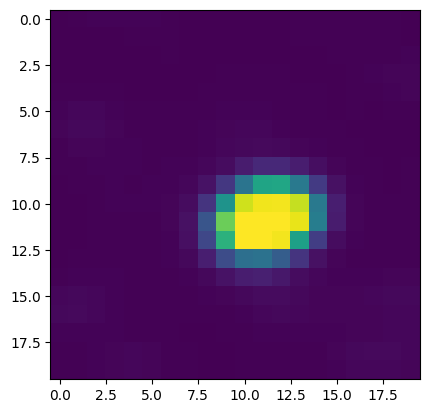

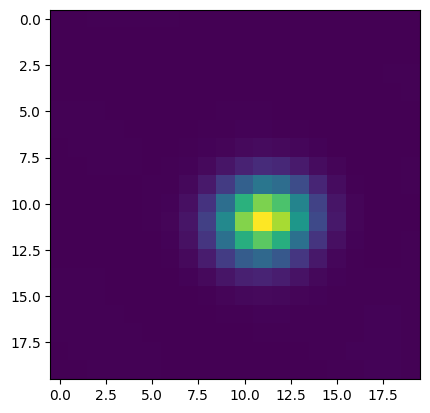

In [70]:
nb = Image('../data/bs_h_ave_wcs.fits')
bb = Image('../data/bs_r_ave_wcs.fits')

nb.cropPixels(50, -50, 50, -50)
bb.cropPixels(50, -50, 50, -50)

sigma = 1
kernel = Gaussian2DKernel(sigma)
img = nb.getImageData()
plt.imshow(img[528:548, 1900:1920])
plt.show()

img = convolve(bb.getImageData(), kernel)
plt.imshow(img[528:548, 1900:1920])

bb.setImageData(img)

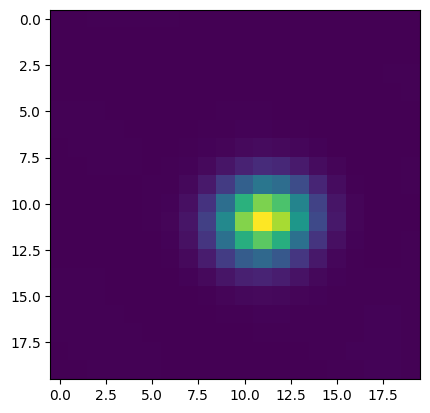

In [71]:
plt.imshow(bb.getImageData()[528:548, 1900:1920])

### Check and remove saturated pixels

In [43]:
print(nb.checkSaturatedPixelCount(saturated_ratio_lim=0.001))
nb.setSaturatedPixelsToNan()
print(nb.checkSaturatedPixelCount(saturated_ratio_lim=0.001))

0
0


### Test loading another image

In [44]:
# nb = Image('data/bs_h_ave_wcs.fits')
# # nb.cropCoords(dec_start='-13d', ra_start='18h28m')
# nb.cropPixels(50, -500, 50, -50)
# nb.plot(showCropped=True, croppedBorder='green', original=True)
# nb.cropPixels(50, -50, 50, -50)
# nb.plot(showCropped=True, croppedBorder='green')

# nb.setSaturatedPixelsToNan()
# bb.setSaturatedPixelsToNan()


### Testing plotting labelled stars

In [63]:
# nb.cropPixels(x_start = 800)

# filter = StarsFilter(data_directory_path="data")
# filter.setStarsInRegion(nb)
# print(filter.getStarsInRegion())
# filter.setVisibleStars(nb)
# print(filter.getVisibleStars())
# nb.setLabeledStars(filter)

# nb.plot(showCropped=True, croppedBorder='green', showLabeledStars=True)

### Testing Zoom Function

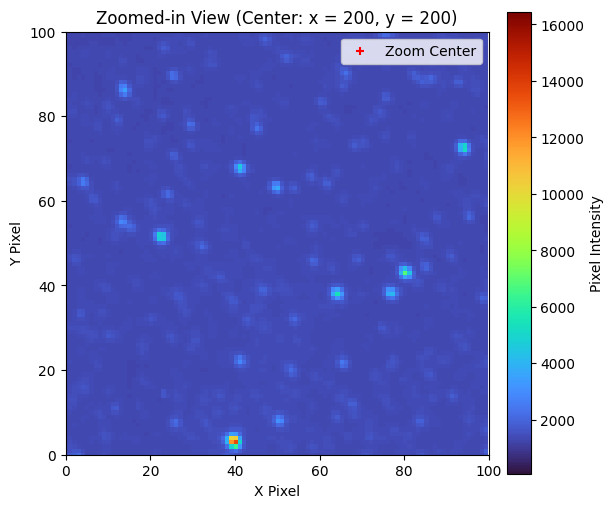

In [6]:
#Zooms into the point (200, 200) in x-y pixels
nb.zoomToPoint(x = 200, y = 200, custom_cmap = 'turbo')

### Testing getBounds

In [45]:
bl, br, tl, tr =nb.getBounds()
print(bl.to_string(style = 'hmsdms'))

18h45m59.12409137s -14d52m55.42596329s


### Testing Subtractor

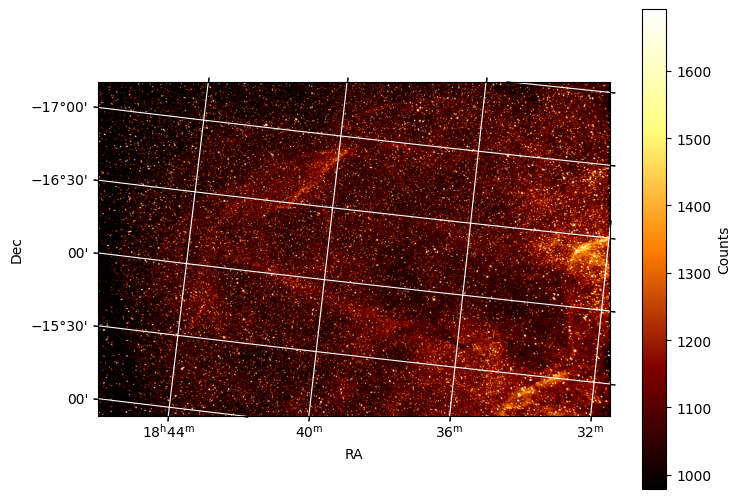

In [46]:
# nb.cropPixels(50, -50, 50, -50)
# bb.cropPixels(50, -50, 50, -50)

# subtracted_image = Image.subtract(nb, bb, mu = 0.5)
# subtracted_image.plot()

### Test Histogram plotting

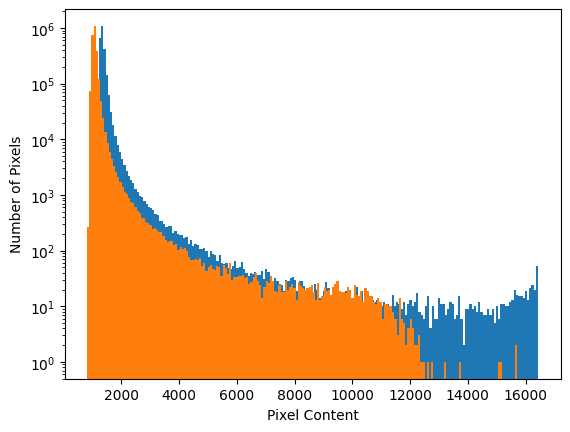

In [47]:
nb.plotHist()
subtracted_image.plotHist()

### Testing MuFinder constructor and finding optimal mus

In [49]:
finder = MuFinder(nb, bb, mu_resolution=0.1, mu_range=(0, 3))


### Plotting the skewness vs mu plot

[np.float64(23.256647297319137), np.float64(22.59112125999329), np.float64(21.948129970126224), np.float64(21.343309716672163), np.float64(20.793864904219717), np.float64(20.315358139605706), np.float64(19.91442507147398), np.float64(19.57408338578641), np.float64(19.226711980311656), np.float64(18.709175665624866), np.float64(17.698718901733663), np.float64(15.644914476725576), np.float64(11.750487580792301), np.float64(5.101042080382086), np.float64(-4.96763262703931), np.float64(-18.35215059468868), np.float64(-33.8860665217389), np.float64(-49.6458402100159), np.float64(-63.7357112634151), np.float64(-74.9649058209302), np.float64(-83.01339934774896), np.float64(-88.18657304662317), np.float64(-91.06988851258504), np.float64(-92.2791677997802), np.float64(-92.3395645730845), np.float64(-91.65268327099783), np.float64(-90.50635876286046), np.float64(-89.09836586134593), np.float64(-87.56051509583462), np.float64(-85.97840784770808)]
[np.float64(23.256647297319137), np.float64(22.591

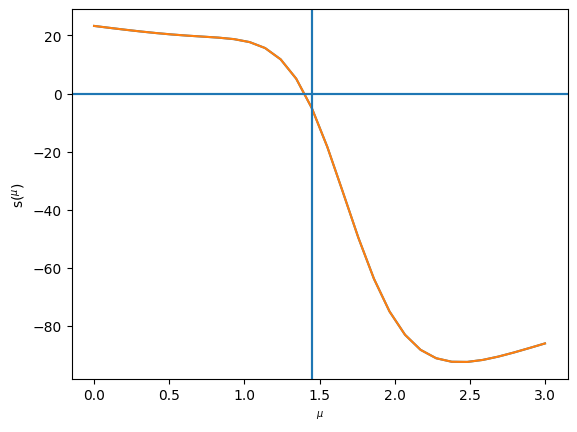

In [50]:
finder.plotSkewnessVals()
# plt.axvline(finder.getOptimalMus()[0])
finder.plotSkewnessVals()
print(finder.getSkewnessVals())

print(finder.skewness_vals)
print(finder.mu_linspace[np.argmin(np.abs(finder.skewness_vals))])


### Getting images from mufinder and plotting them with contours

In [12]:
images = finder.getResultImages()
images[0].setSaturatedPixelsToNan()
plt.show()
images[0].plot(cmap='turbo')
images[0].plotContour(sigma = 9, overlay=True, base_cmap='turbo', alpha=1)


IndexError: list index out of range

# Stars Filter Class

### Test setting a catalogue, either default or custom

In [51]:
hipparcus_filter = StarsFilter(data_directory_path="../data") #Default
tycho_filter = StarsFilter(data_directory_path="../data") #Custom

hipparcus_filter.setCatalogue()
print(hipparcus_filter.getCatalogue())
tycho_filter.setCatalogue(catalogue_id="I/259/tyc2", ra_col_name="RA(ICRS)", dec_col_name="DE(ICRS)", app_mag_col_name="VTmag")
print(tycho_filter.getCatalogue())

Previous saved catalog file found.
                RA        DEC  Vmag
0         0.000899   1.089009  9.10
1         0.004265 -19.498840  9.27
2         0.005024  38.859279  6.61
3         0.008629 -51.893546  8.06
4         0.009973 -40.591202  8.55
...            ...        ...   ...
118213  359.963738  11.673714  6.99
118214  359.974304 -22.428113  8.23
118215  359.976109   5.956552  7.59
118216  359.979458 -64.372313  9.20
118217  359.979078 -65.577132  4.49

[118218 rows x 3 columns]
Previous saved catalog file found.
                 RA        DEC    Vmag
0          2.317542   2.231864  12.146
1          1.125519   2.267396   8.670
2          1.056924   1.897933  12.100
3          0.050866   1.771514  10.521
4          0.050376   1.771482  10.093
...             ...        ...     ...
2539908  344.257744 -88.312507  11.731
2539909  345.767874 -88.284033  12.480
2539910  341.197324 -88.538894  12.158
2539911  337.972190 -88.762908  10.470
2539912  355.960942 -88.834241  12.096

[2

### Set stars within given image/region

In [52]:
hipparcus_filter.setStarsInRegion(nb)
tycho_filter.setStarsInRegion(nb)

hipparcus_stars_in_region = hipparcus_filter.getStarsInRegion()
tycho_stars_in_region = tycho_filter.getStarsInRegion()

print(hipparcus_stars_in_region)
print(hipparcus_stars_in_region.shape)

# print(tycho_stars_in_region)
# print(tycho_stars_in_region.shape)

               RA        DEC   Vmag     x_pixels     y_pixels
90805  278.088825 -16.222659   8.39  1910.516895   538.426214
90814  278.113751 -15.932036   8.32  1880.262945   377.729570
90824  278.157473 -15.701639   7.85  1843.353075   251.671428
90856  278.258437 -16.560188   6.97  1839.210879   736.195650
91029  278.782845 -16.985536   7.10  1584.138862  1002.934468
91048  278.835813 -16.140804   7.76  1505.030824   535.727305
91163  279.174414 -17.206821   7.84  1388.988295  1148.613540
91168  279.198003 -15.945465   7.01  1299.156324   448.264763
91260  279.464871 -17.231285   6.78  1236.061893  1179.167575
91331  279.653249 -16.310071   7.75  1078.299083   678.286179
91498  280.137948 -16.999957  10.66   863.933171  1090.801701
91631  280.542424 -17.011108   7.14   650.005216  1121.667519
91643  280.569037 -15.855779   8.18   560.486846   481.879562
91676  280.665894 -15.521973   6.95   486.938092   302.459853
91755  280.860647 -16.784824   8.02   466.324982  1015.837596
91787  2

### Plot Hist of Star

IMAGE 1, Brightest pixel within range:  16239.0
IMAGE 2, Brightest pixel within range:  14464.0


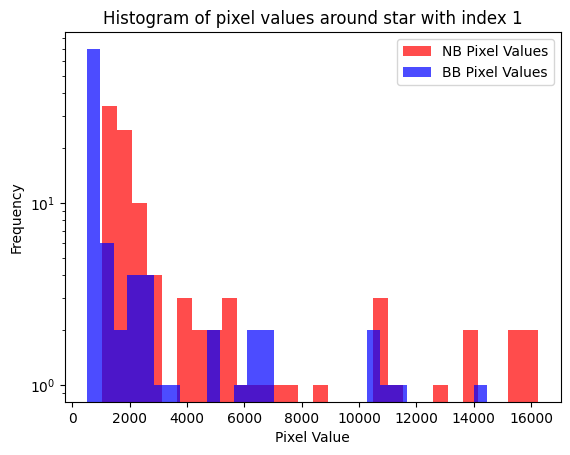

In [53]:
hipparcus_filter.plotHistOfStar(1, nb, bb, print_brightest_pixels=True)
plt.yscale('log')

In [54]:
x = 1910 
y = 538

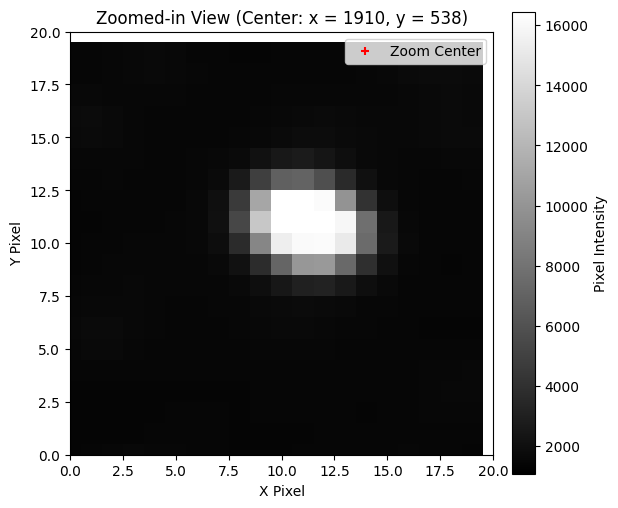

In [72]:
nb.zoomToPoint(x=x, y=y, zoom_size = 10)


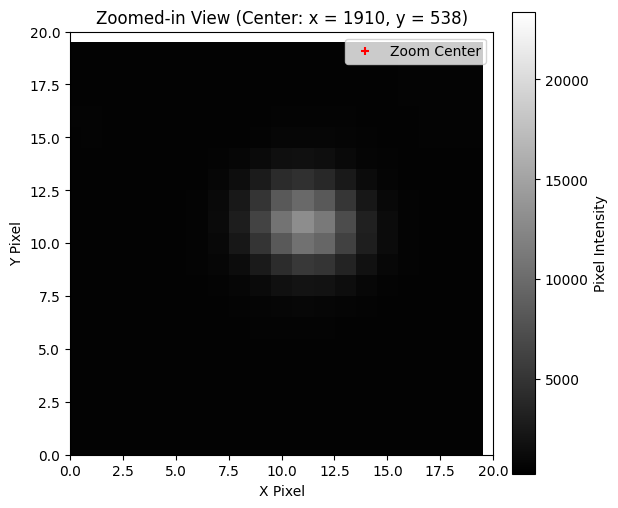

In [73]:
bb.zoomToPoint(x=x, y=y, zoom_size = 10)


In [82]:
resultImg = Image.subtract(nb, bb, 1.45)

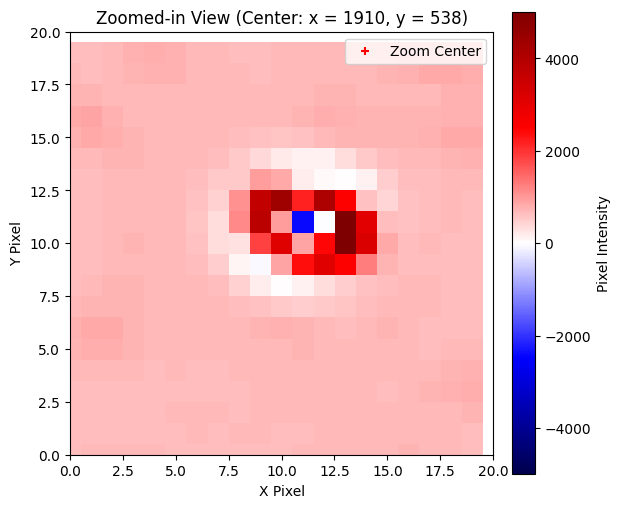

In [83]:
resultImg.zoomToPoint(x=x, y=y, zoom_size = 10, custom_cmap="seismic", custom_vmin=-5000, custom_vmax=5000)

In [ ]:
hipparcus_filter.plotHistOfStar(0, resultImg, resultImg, print_brightest_pixels=True)
plt.yscale('log')

### Test Setting visible stars

In [ ]:
hipparcus_filter.setVisibleStars(nb)
hipparcus_visible_stars = hipparcus_filter.getVisibleStars()
tycho_filter.setVisibleStars(nb)

print(hipparcus_visible_stars)
print(hipparcus_visible_stars.shape)

### Test removing visible stars from given image

In [ ]:
filtered_nb = hipparcus_filter.removeVisibleStars(nb, region_size=5)

plt.show()
nb.setLabeledStars(hipparcus_filter)
nb.plot(showLabeledStars = True, labelCircleSize=15, labelCircleColor='g')
filtered_nb.setLabeledStars(hipparcus_filter)
filtered_nb.plot(showLabeledStars = True, labelCircleSize=15, labelCircleColor='g')
print(hipparcus_filter.getVisibleStars())

In [ ]:
nb.zoomToPoint(x = 865, y = 1095, custom_cmap = "turbo")
filtered_nb.zoomToPoint(x = 865, y = 1095, custom_cmap = "turbo")

### Test all encompassing StarsFilter Function

In [ ]:
newNB = Image('data/bs_h_ave_wcs.fits')
simple_filter = StarsFilter(data_directory_path="data")
newNB.cropPixels(50, -50, 50, -50)
filteredNB = simple_filter.filterStars(newNB)
plt.show()
newNB.setLabeledStars(simple_filter)
newNB.plot(showLabeledStars = True, labelCircleSize=15, labelCircleColor='g')
filteredNB.setLabeledStars(simple_filter)
filteredNB.plot(showLabeledStars = True, labelCircleSize=15, labelCircleColor='g')

### Final Test

In [ ]:
# Simple example in order to do the following
# 1. Load in images and crop in by a certain amount of pixels either side
# 2. Get the optimal mu from the base images
# 3. Filter the stars from each image
# 4. Do the final subtraction with the filtered images and optimal mu
# 5. Plot

# 1. 
nb_img = Image("data/bs_h_ave_wcs.fits")
bb_img = Image("data/bs_r_ave_wcs.fits")

nb_img.cropPixels(100, -100, 100, -100)
bb_img.cropPixels(100, -100, 100, -100)

# 2.
mufinder = MuFinder(nb_img, bb_img, mu_resolution = 0.05)
optimal_mus = mufinder.getOptimalMus()

# 3.
starsFilter = StarsFilter()
starsFilter.setCatalogue(catalogue_id="I/259/tyc2", ra_col_name="RA(ICRS)", dec_col_name="DE(ICRS)", app_mag_col_name="VTmag")
filtered_nb = starsFilter.filterStars(nb_img)
filtered_bb = starsFilter.filterStars(bb_img)

# 4.
result_img = Image.subtract(filtered_nb, filtered_bb, optimal_mus[0])

# 5.
result_img.plot(cmap = 'viridis')